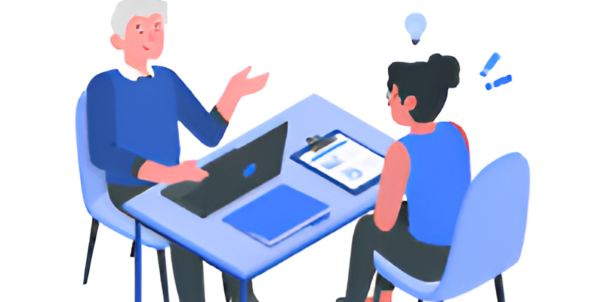

# Placement Prediction

This dataset contains information about the students academic and training and placement status.

Data source: https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data

### Columns description

* CGPA: It is the overall grades achieved by the student.

* Internships: It tells the number of internships a student has done.

* Projects: Number of projects a student has done.

* Workshops/Certifications: As there are multiple courses available online student opt for them to upskill themselves.

* ApptitudeTestScore: Aptitude test are generally a part of the recruitment process to understand the Quant and logical thinking of the student.

* SoftSkillrating: Communication is a key role that plays in the placement or in any aspect of the life.

* ExtraCurricularActivities: This helps provide and insight about the personality of an individual regarding how much he is active other than the academic.

* PlacementTraining: It is provided to students in college to ace the placement process.

* SSC and HSC: Senior Secondary and Higher Secondary Marks.

* PlacementStatus: This is our target column with two classes placed and not placed.

__________________________________

This notebook is developed by Machine Learning and classification criterias including three main parts:

#### Data loading and data analysis, Data preprocessing, Modeling and evaluation

### Part 1 (Data loading and data analysis)

As starter part, it contains loading data, statistical analysis and data visualization

In [391]:
# Import necessaries
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
import seaborn as sn
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier , ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
from lightgbm import LGBMClassifier

scaler = StandardScaler() # Instance from 'StandardScaler' object

In [392]:
# Data loading
try:
    file = pd.read_csv('placementdata.csv')
    df = file.copy()
except: print('Something went wrong when reading the file!')

In [393]:
df.sample(10)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
5041,5042,6.5,2,1,2,79,4.4,No,No,55,66,NotPlaced
1513,1514,8.3,2,3,2,90,4.8,Yes,Yes,82,86,Placed
7253,7254,8.5,1,2,0,89,4.8,Yes,Yes,74,82,Placed
4389,4390,8.4,0,2,0,69,4.0,Yes,Yes,55,72,Placed
9287,9288,8.0,2,3,2,90,4.8,Yes,Yes,75,88,Placed
8311,8312,8.4,2,3,2,90,4.7,Yes,Yes,69,88,Placed
5346,5347,7.4,1,1,0,80,4.8,No,Yes,64,73,NotPlaced
9603,9604,8.4,2,2,0,84,3.9,Yes,Yes,76,68,NotPlaced
6131,6132,8.7,1,3,1,90,4.0,Yes,Yes,81,80,Placed
4925,4926,7.6,1,2,1,67,4.4,Yes,Yes,61,73,Placed


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [395]:
# Count of null values in each column
df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [396]:
# Total count of duplicated rows in whole dataset
df.duplicated().sum()

0

In [397]:
df = df.drop(['StudentID'],axis=1) # Drop unnecessary column

In [398]:
df.describe()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


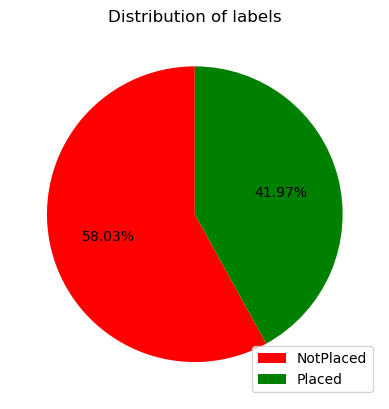

In [399]:
plt.pie(df.PlacementStatus.value_counts().values,autopct='%.2f%%',colors=['red','green'], startangle=90)
plt.legend(df.PlacementStatus.unique())
plt.title('Distribution of labels')
plt.show()

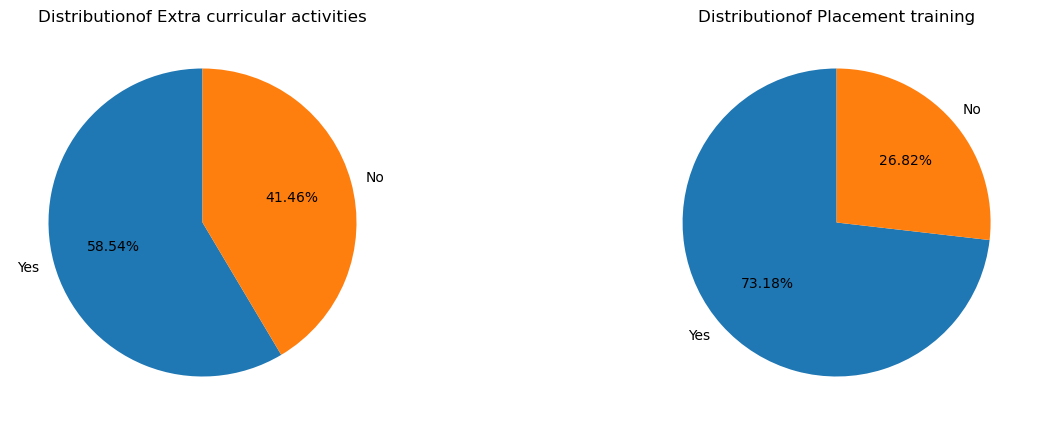

In [400]:
data = [df.ExtracurricularActivities.value_counts().values,df.PlacementTraining.value_counts().values]
titles = ['Extra curricular activities','Placement training']
fig, axes = plt.subplots(1,2,figsize=(15,5))
for i , ax in enumerate(axes):
    ax.pie(data[i],autopct='%.2f%%',labels=['Yes','No'] ,startangle=90)
    ax.set_title(f'Distributionof {titles[i]}')

In [401]:
# This process is about calculating average of numeric values in each label

results = list()  # Initialize an empty list to store summary DataFrames
values = list()  # Initialize an empty list to store value counts
titles = list()  # Initialize an empty list to store plot titles

for i in df.PlacementStatus.unique():  # Iterate over unique values in the 'PlacementStatus' column
    temp_df = df[df.PlacementStatus == i]  # Filter the DataFrame for the current 'PlacementStatus' value

    # Count values of the 'PlacementTraining' feature and store them
    values.append(temp_df.PlacementTraining.value_counts().values)
    titles.append(f'Count of "placement training" feature \nin "{i}" data')

    # Count values of the 'ExtracurricularActivities' feature and store them
    values.append(temp_df.ExtracurricularActivities.value_counts().values)
    titles.append(f'Count of "extra curricular activities" feature \nin "{i}" data')

    # Drop the specified columns to focus on numerical data
    temp_df = temp_df.drop(['PlacementTraining', 'ExtracurricularActivities', 'PlacementStatus'], axis=1)

    # Compute the mean of the remaining features and store the results
    DF = pd.DataFrame([temp_df.describe().values[1]], columns=[f'Average of {j}' for j in temp_df.columns])
    results.append(DF)  # Append the summary DataFrame to the results list


##### Average of numeric values in "Not placed" data

In [402]:
results[0]

,Average of CGPA,Average of Internships,Average of Projects,Average of Workshops/Certifications,Average of AptitudeTestScore,Average of SoftSkillsRating,Average of SSC_Marks,Average of HSC_Marks
0,7.467672,0.901775,1.675857,0.73462,75.829399,4.174393,64.99259,70.665346


##### Average of numeric values in "Placed" data

In [403]:
results[1]

,Average of CGPA,Average of Internships,Average of Projects,Average of Workshops/Certifications,Average of AptitudeTestScore,Average of SoftSkillsRating,Average of SSC_Marks,Average of HSC_Marks
0,8.016488,1.253038,2.511556,1.39838,84.455802,4.53076,74.920658,79.805575


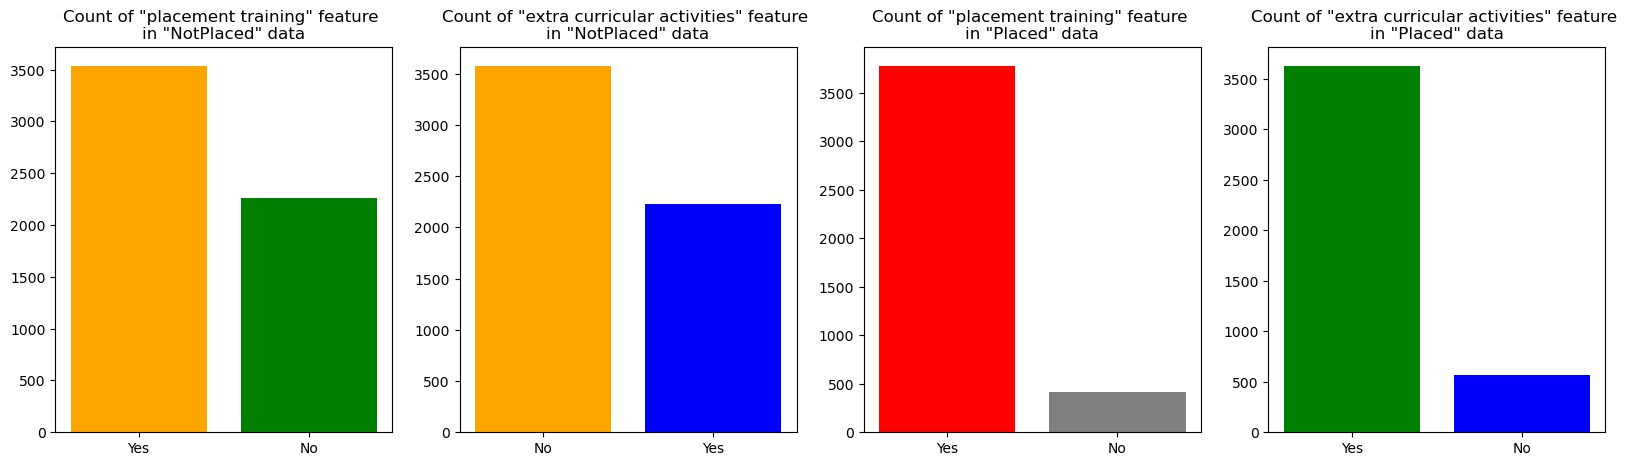

In [404]:
slices = [['Yes','No'],['No','Yes'],['Yes','No'],['Yes','No']]
colors_board = ['blue','red','gray','green','yellow','orange']
fig, axes = plt.subplots(1,4,figsize=(20,5))
idx = 0
for i , ax in enumerate(axes):
    ax.bar(x=slices[idx],height=values[idx],color=rn.sample(colors_board,2))
    ax.set_title(titles[idx])
    idx+=1

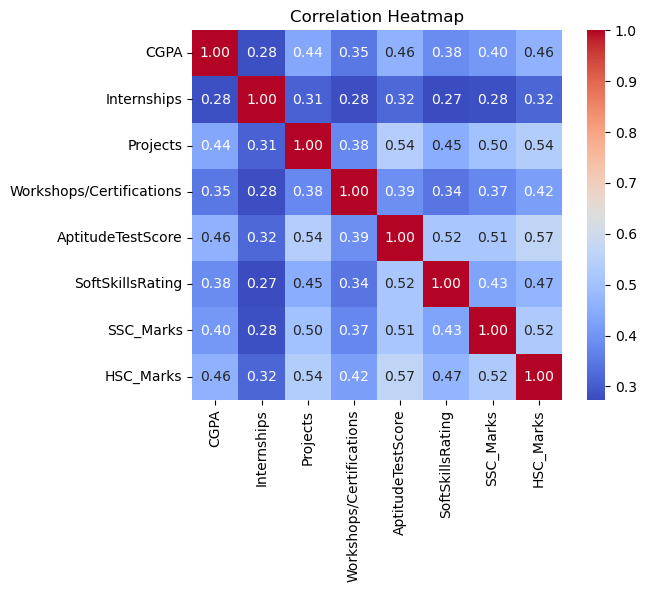

In [405]:
temp_df = df[[col for col in df.columns if df[col].dtype!='O']]
Corr = temp_df.corr()
sn.heatmap(Corr,annot=True,fmt='.2f',cmap='coolwarm',square=True)
plt.title('Correlation Heatmap')
plt.show()

_______________________________________

### Part2 (Data preprocessing)

The notebook continues with dealing with outliers, encoding categorical columns, splitting data into train and test sets and finally scaling data

In [406]:
z_scores = np.abs(stats.zscore(temp_df))
# Identify columns where any Z-score is greater than 3
outliers = (z_scores > 3).any(axis=0)
# Print the columns with potential outliers
print(f"Columns with potential outliers: {temp_df.columns[outliers]}")

Columns with potential outliers: Index(['SoftSkillsRating'], dtype='object')


In [407]:
z_scores = np.abs(stats.zscore(df[['SoftSkillsRating']]))
# Create a boolean mask to filter out rows where Z-score > 3 in either column
Filter = (z_scores < 3).all(axis=1)
# Filter the DataFrame
df_cleaned = df[Filter]
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)

Shape before removing outliers: (10000, 11)
Shape after removing outliers: (9980, 11)


In [408]:
label = df_cleaned.PlacementStatus.to_numpy()
df_cleaned = df_cleaned.drop(['PlacementStatus'],axis=1) # Drop labels from raw data

In [409]:
encoded_df = pd.get_dummies(df_cleaned) # Encode categorical columns
encoded_df = encoded_df.reset_index(drop=True)
encoded_df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,ExtracurricularActivities_No,ExtracurricularActivities_Yes,PlacementTraining_No,PlacementTraining_Yes
0,7.5,1,1,1,65,4.4,61,79,True,False,True,False
1,8.9,0,3,2,90,4.0,78,82,False,True,False,True
2,7.3,1,2,2,82,4.8,79,80,False,True,True,False
3,7.5,1,1,2,85,4.4,81,80,False,True,False,True
4,8.3,1,2,2,86,4.5,74,88,False,True,False,True


In [410]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CGPA                           9980 non-null   float64
 1   Internships                    9980 non-null   int64  
 2   Projects                       9980 non-null   int64  
 3   Workshops/Certifications       9980 non-null   int64  
 4   AptitudeTestScore              9980 non-null   int64  
 5   SoftSkillsRating               9980 non-null   float64
 6   SSC_Marks                      9980 non-null   int64  
 7   HSC_Marks                      9980 non-null   int64  
 8   ExtracurricularActivities_No   9980 non-null   bool   
 9   ExtracurricularActivities_Yes  9980 non-null   bool   
 10  PlacementTraining_No           9980 non-null   bool   
 11  PlacementTraining_Yes          9980 non-null   bool   
dtypes: bool(4), float64(2), int64(6)
memory usage: 6

In [411]:
# Split data into train and test sets
# 90% of data is considered as train set
xtr , xts , ytr ,yts = train_test_split(encoded_df,label,test_size=0.1,random_state=0)

In [412]:
print('Count of train set: ',len(xtr))
print('Count of test set: ',len(xts))

Count of train set:  8982
Count of test set:  998


In [413]:
scaler.fit(xtr) # Get mean and standard division of train set
scaled_train = scaler.transform(xtr) # Scale train set
scaled_test = scaler.transform(xts) # Scale test set
scaled_df = scaler.transform(encoded_df) # Scale the whole data
print('Shape of train set: ',scaled_train.shape)
print('Shape of test set: ',scaled_test.shape)
print('Shape of full data: ',scaled_df.shape)

Shape of train set:  (8982, 12)
Shape of test set:  (998, 12)
Shape of full data:  (9980, 12)


______________________________________________________

### Part3 (Modeling and evaluation)

Final part is about finding best model through the most known classifiers, finding best hyperparameters, cross validation and confusion matrix

In [414]:
# List of classifiers
models = [DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier,
          KNeighborsClassifier, LogisticRegression, LGBMClassifier]

result = list()  # Initialize an empty list to store model evaluation results

# Loop through each model in the list
for model in models:
    
    alg = model()  # Instantiate the model
    alg.fit(scaled_train, ytr)  # Train the model on the scaled training set

    trscore = alg.score(scaled_train, ytr) * 100  # Compute training accuracy percentage
    tsscore = alg.score(scaled_test, yts) * 100  # Compute test accuracy percentage

    # Check for possible overfitting if the training accuracy is significantly higher than test accuracy
    possible_overfit = 'No'
    if trscore - tsscore > 5:
        possible_overfit = 'Yes'

    # Append the results to the list
    result.append([str(model).split('.')[-1][:-2],  # Extract the classifier name
                   trscore,
                   tsscore,
                   possible_overfit])

# Convert the result list into a DataFrame for better readability
result = pd.DataFrame(result, columns=['Model', 'Accuracy on train set', 'Accuracy on test set', 'Possible overfit'])


[LightGBM] [Info] Number of positive: 3761, number of negative: 5221
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 8982, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.418726 -> initscore=-0.328004
[LightGBM] [Info] Start training from score -0.328004


In [415]:
result # Showcase the result

,Model,Accuracy on train set,Accuracy on test set,Possible overfit
0,DecisionTreeClassifier,99.922066,71.843687,Yes
1,RandomForestClassifier,99.922066,79.458918,Yes
2,GradientBoostingClassifier,81.674460,79.458918,No
3,ExtraTreesClassifier,99.922066,78.857715,Yes
4,KNeighborsClassifier,83.478067,78.156313,Yes
5,LogisticRegression,79.915386,80.460922,No
6,LGBMClassifier,85.682476,79.859719,Yes


In [416]:
# Define the model and hyperparameter grid
model = GradientBoostingClassifier()
params = {'n_estimators': [100,150],
'max_depth': [5,6]}
# Perform GridSearchCV
grid_search = GridSearchCV(model, params, cv=3, scoring='accuracy')
grid_search.fit(scaled_train, ytr)
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 5, 'n_estimators': 100}


In [417]:
# Create a model
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)
# Use cross validation technique in order to have better insight.
scores = cross_val_score(model,scaled_df,label,cv=5,scoring='accuracy')
print("Cross-Validation accuracy scores:", scores)
print("Mean of scores:", scores.mean())

Cross-Validation accuracy scores: [0.78857715 0.79308617 0.79809619 0.79108216 0.79559118]
Mean of scores: 0.7932865731462926


In [418]:
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)
model.fit(scaled_train,ytr)
print(f'Accuracy on train data: {model.score(scaled_train,ytr)*100:.2f}%')
print(f'Accuracy on test data: {model.score(scaled_test,yts)*100:.2f}%')
print(f'Accuracy on full dataframe: {model.score(scaled_df,label)*100:.2f}%')

Accuracy on train data: 85.24%
Accuracy on test data: 80.26%
Accuracy on full dataframe: 84.74%


Text(0.5, 1.0, 'Confusion matrix')

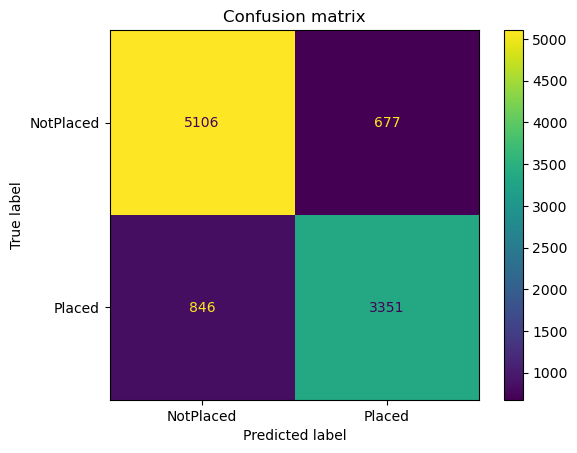

In [419]:
predicts = model.predict(scaled_df)
con = confusion_matrix(label,predicts)
display = ConfusionMatrixDisplay(con,display_labels=['NotPlaced','Placed'])
display.plot()
plt.title('Confusion matrix')

# End